In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# Import Data

In [27]:
source = 'http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
data = pd.read_csv(source, sep=',', header = None)
print('data shape:',data.shape)

data shape: (768, 9)


In [28]:
print('class 0:' , data[data.iloc[:,8]==0].shape[0])
print('class 1:' , data[data.iloc[:,8]==1].shape[0])

class 0: 500
class 1: 268


Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1)  

In [29]:
column_names = ['number_pregnant', 'tolerance test', 'blood pressure', 'skin fold thickness', 'insulin'
          , 'BMI', 'DPF', 'age', 'diabete']
data.columns = column_names
data.describe()

,number_pregnant,tolerance test,blood pressure,skin fold thickness,insulin,BMI,DPF,age,diabete
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Box Plot

/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


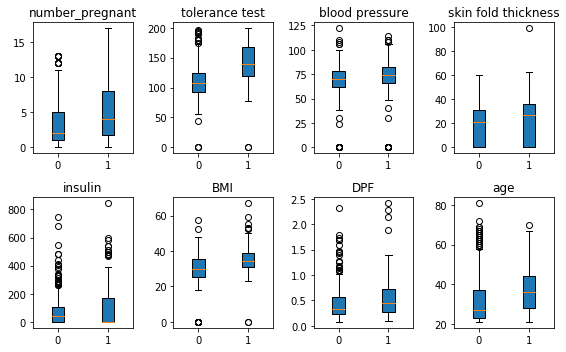

In [30]:
pos = [0, 1]
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.tight_layout()
    
    box_data = [ data.loc[(data.iloc[:,8]==diabete)].iloc[:,i] for diabete in range(2)]
    plt.boxplot(box_data, widths = 0.25, positions = pos
                , patch_artist=True)
    plt.title(data.columns[i])


plt.show()

# Train_Test_Split & Normalization

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

train_X, test_X, train_y, test_y = train_test_split(data.iloc[:,0:-1:1], data.iloc[:,-1], test_size=0.25
                              , shuffle=True, random_state=42)
#train_X = scale(train_X)
#test_X = scale(test_X)

#  Training

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# F1- Score Optimize

In [33]:
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score 
def optimize(model, train_X, train_y):
    tpr_temp=[]
    fpr_temp=[]
    precision_temp=[]
    recall_temp=[]
    f1_score_temp=[]
    for threshold in [x/10 for x in range(10)]:
        pred = (model.predict_proba(train_X)[:,1] >= threshold).astype(int) #將預測機率大於threshold的分類為1
        cm = confusion_matrix(train_y, pred)
        tpr = cm[1][1]/cm.sum(axis=1)[1]
        fpr = cm[1][0]/cm.sum(axis=0)[0]
        pre = cm[1][1]/cm.sum(axis=0)[1] #precision
        re = cm[1][1]/cm.sum(axis=1)[1] #recall
        f1 = 2*(pre*re)/(pre+re)

        #將各種評估值存取成list
        tpr_temp.append(tpr)
        fpr_temp.append(fpr)
        precision_temp.append(pre)
        recall_temp.append(re)
        f1_score_temp.append('nan' if f1!=f1 else round(f1,3))

    return f1_score_temp, tpr_temp, fpr_temp, precision_temp, recall_temp

/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


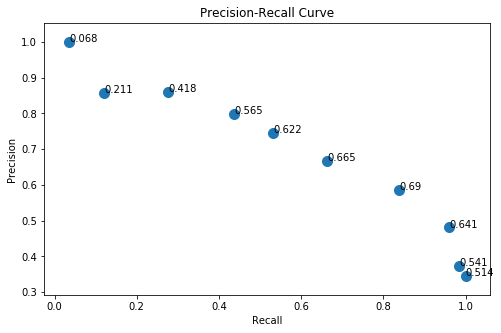

In [34]:
f1, tpr, fpr, precision, recall = optimize(model, train_X, train_y )

plt.scatter(recall ,precision, s=100)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
# Show F1 Score on each point
for i, txt in enumerate(f1):
    plt.annotate(txt, (recall[i],precision[i])) 


plt.show()

In [24]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf',C=0.8 ,gamma=0.06, probability=True)
model.fit(train_X, train_y)

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.06, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


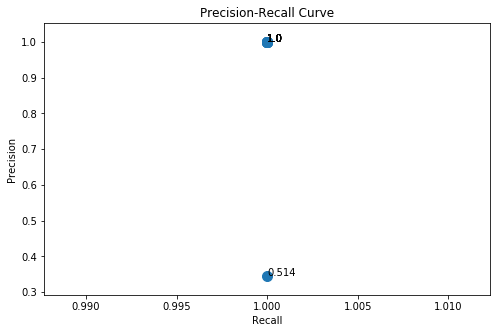

In [25]:
f1, tpr, fpr, precision, recall = optimize(model, train_X, train_y )

plt.scatter(recall ,precision, s=100)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
# Show F1 Score on each point
for i, txt in enumerate(f1):
    plt.annotate(txt, (recall[i],precision[i])) 


plt.show()

In [11]:
#prediction = model.predict(test_X)

print(classification_report(test_y, prediction))
print('accuracy:', accuracy_score(test_y, prediction))

             precision    recall  f1-score   support

          0       0.85      0.67      0.75       123
          1       0.57      0.78      0.66        69

avg / total       0.75      0.71      0.71       192

accuracy: 0.708333333333


NameError: name 'optimize' is not defined

In [12]:
confusion_matrix(test_y, prediction)

array([[82, 41],
       [15, 54]])

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
model = svm.SVC(kernel = 'rbf',C=0.8 ,gamma=0.06, probability=True)
model.fit(train_X, train_y)
'''''
parameter = {'C':[0.6, 0.8, 1, 1.2], 'gamma':[0.02, 0.04, 0.06, 0.08]}
best_model = GridSearchCV(model, parameter, cv=3, scoring='roc_auc')
best_model.fit(train_X, train_y)
best_model.best_estimator_
'''''